In [180]:
%matplotlib inline
import matplotlib.pyplot as plt

In [183]:
from misc.getData import get_data
from misc.correctTime import utc_to_tz

In [182]:
import pandas as pd

In [142]:
def aggChunk(chunk, rs='D'):
    '''aggregate chunk to dictionary of timestamps per day, 
    count of tweets as a value'''
    
    ch = chunk.set_index(utc_to_tz(chunk['ts'])).resample(rs, how='count')
    ch.columns = ['count',]
    return ch

In [158]:
def dedupeAgg(df):
    '''summ records for equal indexes'''
    return df.groupby(df.index).agg(sum)
    

In [195]:
def plotNsave(r, path='timeline.png'):
    fig, ax = plt.subplots(figsize=(18,5))
    r.plot(figsize=(18,5), legend=False, ax=ax)
    ax.set_xlabel('Datetime')
    ax.set_ylabel('Number of tweets')
    ax.set_title('Number of tweets, daily')
    fig.savefig('plt.png')

In [196]:
def execute():
    path='timeline.png'
    
    chunks = get_data(columns=['ts',], chs=100000)
    r = dedupeAgg(reduce(lambda x,y: x.append(y), (aggChunk(x) for x in chunks) ))
    plotNsave(r, path=path)
    
    print 'saved timeline to {0}'.format(path)
    
    

executing SELECT ts FROM tweets on database
../../../QC_data/DATAVAULT/OUT/2015_10_30_all.db
saved timeline to timeline.png


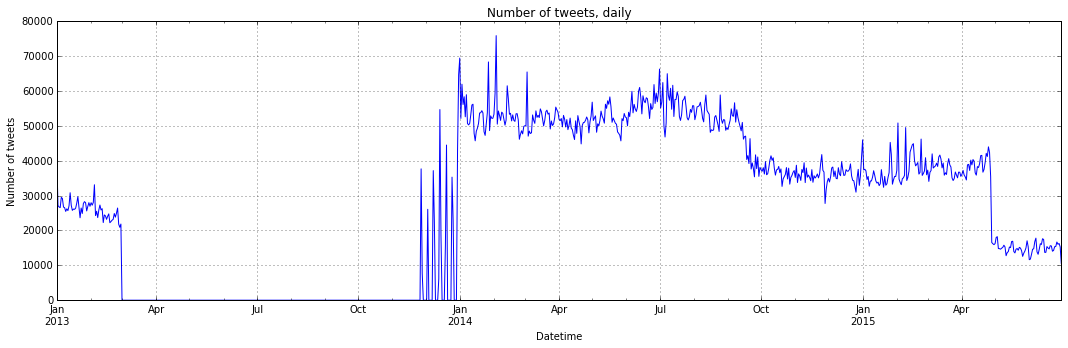

In [197]:
execute()